# T Test

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [2]:
#creating random data set of different weights for individuals
average_weight = [33,34,35,36,32,28,29,30,31,37,36,35,33,34,31,40,24]

Hypothesis testing is all about assumption we create.
* Average weight in class 12th is 35, Means Hypothesized mean is 35
* Null Hypothesis , H0 = Average age in class 12th is 35
* Alt Hypothesis , Ha = Average age in class 12th is not 35

In [5]:
from scipy import stats

# One sample T test
It is used for only one sample

In [7]:
stats.ttest_1samp(average_weight,popmean=35)

Ttest_1sampResult(statistic=-2.354253623010381, pvalue=0.03166804359862131)

P value = 0.031 = 3.1%, This means that the probablity (or chance) of avaerage_weight 35 is only 3.1%. That is our Null Hypothesis is Wrong.
* Generalizing, if P value < 5 % , we REJECT Null Hypothesis.
* In our example, we REJECT H0, and conclude Ha that average_age in class 12th is NOT 35

# Two sample independent T test

In [8]:
#creating an random data set of student in class 11th with each student weight
average_weight1 = [29,31,28,33,31,34,32,20,32,28,27,26,30,31,34,30]
average_weight #average weight of class 12th student as seen in One-Sample T-Test

[33, 34, 35, 36, 32, 28, 29, 30, 31, 37, 36, 35, 33, 34, 31, 40, 24]

creating our assumptions
* Null Hypothesis , H0 = Average_weight of class 12th & class 11th student is same.
* Alt Hypothesis , Ha = Average_weight of class 12th & class 11th student is not same.

In [9]:
stats.ttest_ind(average_weight,average_weight1)

Ttest_indResult(statistic=2.404544177024533, pvalue=0.022355127034138323)

P value = 0.022 = 2.2%, This means that the probablity (or chance) of average_weight of class 12th & class 11th students is same is only 2.2%. 
* Null Hypothesis is Wrong.
* We REJECT Null Hypothesis. Concluding,Average_weigth of class 12th & class 11th student is not same.

# Two Sample paired (or Relational) T - test

We use Two Sample paired T-Test with keep in mind in simple way to check the effect before & after.
Studying effect of metaphor medicine on headache for individual who are suffering from migrain.
* let's create random data set of individuals who are suffering from headache & we have given them two medicines one is paracetamol & another is metaphor,took the reading before having metaphor & after having metaphor.

In [10]:
#let's create random data set of individuals who are suffering from headache & we have given them two medic
before_metaphor = [68,45,46,34,23,67,80,120,34,54,68]
after_metaphor = [28,25,26,24,13,37,30,30,54,34,38]

* H NULL = H0 = Response times before and after metaphor are same. This means Metaphor has NO EFFECT
* H Alternative = Ha = Response times before and after Metaphor are NOT same. This means Metaphor has EFFECT

In [11]:
stats.ttest_rel(before_metaphor,after_metaphor)

Ttest_relResult(statistic=3.2771720738937873, pvalue=0.00832867082029929)

P value = 0.008, 0.8% . P < 5%, So we reject H0 and accept Ha, This means Metaphor has EFFECT on migrain suffered individuls

# Testing on dataset

In [12]:
df=pd.read_csv("bike_sharing.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [14]:
df.shape

(10886, 12)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [16]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [17]:
df["temp"].corr(df["atemp"])

0.9849481104817077

Atemp and temp has correlation of 0.985. They are providing the same information. We will drop the atemp feature and also datetime for our simplicity.

In [18]:
df.drop(['datetime','atemp'],axis = 1,inplace=True)

In [19]:
#check the unique values in each column
df.apply(lambda x : x.nunique())

season          4
holiday         2
workingday      2
weather         4
temp           49
humidity       89
windspeed      28
casual        309
registered    731
count         822
dtype: int64

In [25]:
#standardize all the numerical features
num_scaled = scale(df[['temp','humidity','windspeed','casual','registered']],copy=False)
#scale takes the difference of each values from the mean and divide by standard deviation
num_scaled

array([[-1.33366069,  0.99321305, -1.56775367, -0.66099193, -0.94385353],
       [-1.43890721,  0.94124921, -1.56775367, -0.56090822, -0.81805246],
       [-1.43890721,  0.94124921, -1.56775367, -0.62095844, -0.851158  ],
       ...,
       [-0.80742813, -0.04606385,  0.26970368, -0.64097518,  0.05593396],
       [-0.80742813, -0.04606385, -0.83244247, -0.48084125, -0.25525818],
       [-0.91267464,  0.21375537, -0.46560752, -0.64097518, -0.47375478]])

### Preparing Data for t-test
* Now we will perform t-test to check whether the number of bike rentals are dependent on working day or not. For this we will use two sample t-test.
* Two sample t-test is used to check whether the means of two samples(group) are same or different. We want to check whether the number of bikes rented on working day are different then number of bikes rented on non working days.
* Let's check the mean of bikes rented on working and non-working days.

In [31]:
df.groupby("workingday")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


We can see that mean on working days is 193.0 and mean on the non-working day is 188.5. Definitely we can see that there is difference in the means of working and non working days. But the quetsion is, is this difference in the mean stastically significant or was it just due to random chance ?
Steps for performing hypothesis testing.
1. set up Null Hypothesis (H0)
2. State the alternate hypothesis (H1)
3. Set a significance level (alpha)
4. Calculate test Statistics.
5. Decision to accept or reject null hypothesis.

In [32]:
#create 2 samples one for working days and one for non-working days
sample_01 = df[df['workingday'] == 1]
sample_02 = df[df['workingday'] == 0]

In [34]:
print(sample_01.shape,sample_02.shape)

(7412, 10) (3474, 10)


In [35]:
#make equal number of records in each sample
sample_01 = sample_01.sample(3474)
print(sample_01.shape,sample_02.shape)

(3474, 10) (3474, 10)


Before directly jumping for hypothesis testing we have to check for different assumptions related to the kind of
hypothesis test we want to perform.

### Assumption for T-Test
1. The variances of the 2 samples are equal(We will use Levene's test to check this assumption).
2. The distrubtion of the residuals b/w the two groups should follow the normal distribution. We can plot histogram and see whether the distribution follows the normal distribution or not. We can also plot a Q-Q plot. We can check the normality using shapiro-wilks test as well

In [36]:
#Levene's test to check whether the variances of the two group are same.
#H0 : Variances are same.
#H1 : Variances are not same.
#Alpha = 0.05%
#if p-value > alpha (Cannot reject H0)
#if p-value < alpha (Accept null hypothesis)

In [38]:
alpha = 0.05
Stats,Pvalue = stats.levene(sample_01['count'],sample_01['count'])
print(f' Test statistics : {Stats} \n Alpha : {alpha} \n P-value : {Pvalue}')
if Pvalue > alpha:
    print(' Variances are same accept null hypothesis ')
else:
    print(' Variances are not same reject not null hypothesis ')

 Test statistics : 0.0 
 Alpha : 0.05 
 P-value : 1.0
 Variances are same accept null hypothesis 


### Check for normality

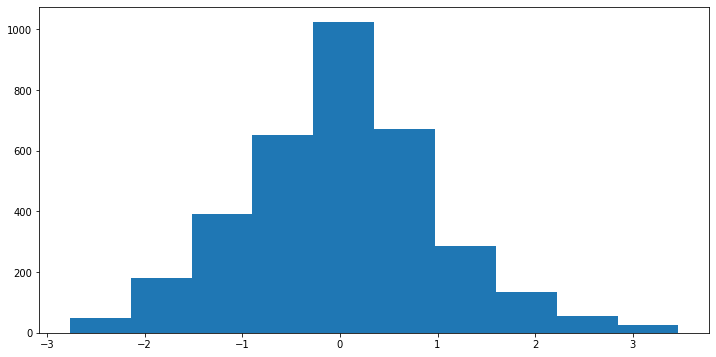

In [39]:
# we will scale the difference
diff = scale((np.array(sample_01['count']) - np.array(sample_02['count'])))
plt.figure(figsize=(12,6))
plt.hist(diff)
plt.show()

The distribution seems very close to normal distribution. Let's check other methods to check the normality of the residuals.
* Q-Q plot, Generates the a probability of sample data against the quantiles of theoretical distributions.

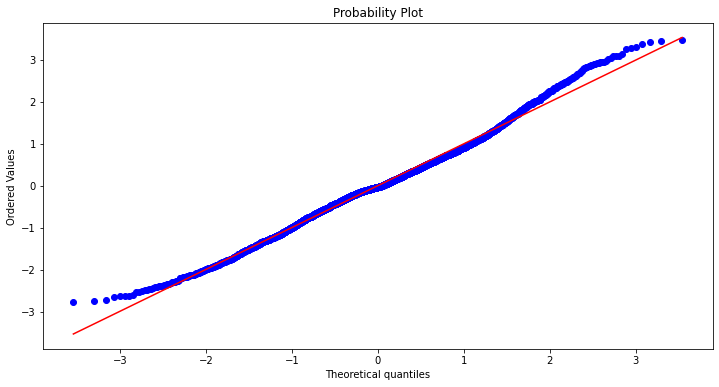

In [40]:
#q-q plot to check the normality
plt.figure(figsize=(12,6))
stats.probplot(diff,plot=plt,dist='norm')
plt.show()

In [41]:
#Stastical test for checking normality
#Shapiro-wilk test
#H0 : Normally distributed
#H1 : Not Normally distributed
alpha = 0.05
statistic,p_value = stats.shapiro(diff)
if p_value > alpha:
    print(f'Accept Null Hypothesis p-value : {p_value}')
else:
    print(f'Reject Null Hypothesis p-value : {p_value}')

Reject Null Hypothesis p-value : 9.957431580664977e-12


Here shapiro wilk test shows that the residuals are not normally distributed. for demonstration purpose We will continue with t-test, but in practice we should not perform t-test when the assumption of normality is voilated.

In [43]:
# H0 : There's no difference in mean (Bike rental doesn't depends on workingday)
# H1 : There's a difference in mean (Bike rental depends on workingday)
# Alpha : 0.05%
alpha = 0.05
statistic , p_value = stats.ttest_ind(sample_01['count'],sample_02['count'])
if p_value > alpha:
    print(f'Fail to reject Null Hypothesis p-value is {p_value}')
else:
    print('Reject Null Hypothesis')

Fail to reject Null Hypothesis p-value is 0.17707710855121822


As we can see that the p-value is greater than alpha. So we can't reject our null hypothesis.
working day has no effect on number of bikes rented.